In [ ]:
Pkg.add("Graphs")
Pkg.add("GraphLayout")

In [12]:
using Plots
pyplot(size=(500,300))
import Graphs, GraphLayout

In [13]:
n = 5
g = Graphs.simple_graph(n)
for (i,j) in [(1,2),(2,3),(1,3),(2,4),(3,5)]
    Graphs.add_edge!(g, i, j)
end

In [14]:
am = Graphs.adjacency_matrix(g)

5x5 Array{Bool,2}:
 false   true   true  false  false
 false  false   true   true  false
 false  false  false  false   true
 false  false  false  false  false
 false  false  false  false  false

In [4]:
x, y = GraphLayout.layout_spring_adj(am)

([0.052086460387572364,-0.3342146774168322,0.3672453741159285,-1.0,1.0],[1.0,-0.16601740453784009,-0.33155139142758694,-0.5332447092524314,-1.0])

In [5]:
function graph_edge_lists(x, y)
    edgex, edgey = zeros(0), zeros(0)
    for i=1:n, j=1:n
        if am[i,j]
            append!(edgex, [x[i], x[j], NaN])
            append!(edgey, [y[i], y[j], NaN])
        end
    end
    edgex, edgey
end

graph_edge_lists (generic function with 1 method)

In [10]:
edgex, edgey = graph_edge_lists(x, y)

([0.052086460387572364,-0.3342146774168322,NaN,0.052086460387572364,0.3672453741159285,NaN,-0.3342146774168322,0.3672453741159285,NaN,-0.3342146774168322,-1.0,NaN,0.3672453741159285,1.0,NaN],[1.0,-0.16601740453784009,NaN,1.0,-0.33155139142758694,NaN,-0.16601740453784009,-0.33155139142758694,NaN,-0.16601740453784009,-0.5332447092524314,NaN,-0.33155139142758694,-1.0,NaN])

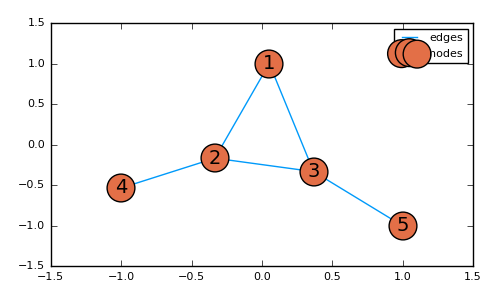

In [11]:
with(leg=:best, grid=false) do
    plot(edgex, edgey, lab="edges")
    scatter!(x, y, m=20, lab="nodes", ann=map(text,1:n))
end